https://sgpp.sparsegrids.org/docs/example_refinement_py.html  
https://sgpp.github.io/SGpp/example_combigrid_py.html

In [1]:
#allows any changes on external files to be loaded on code run.
%load_ext autoreload
%autoreload 2   

import sys, os
sys.path.append('../')

debug tuple <class 'numpy.ndarray'>
debug tuple <class 'numpy.ndarray'>


/home/djdaniel/GENE_UQ/SGPP_testing/../GENE_ML/gene_ml/test_functions/max_of_many_gaussians.py:119: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figure.show()


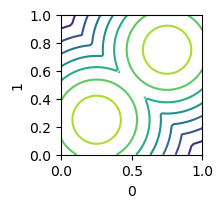

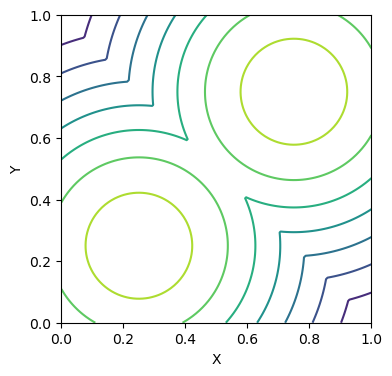

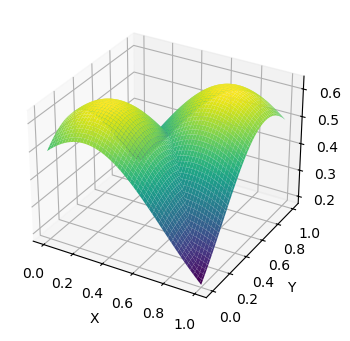

In [2]:
import sys, os
sys.path.append('../')

from GENE_ML.gene_ml.test_functions.max_of_many_gaussians import MaxOfManyGaussians
import numpy as np
import matplotlib.pyplot as plt


num_dim = 2
bounds = [(0,1) for i in range(num_dim)]
num_gaussians = 2
std=0.5
mmg = MaxOfManyGaussians(num_dim, bounds)#num_dim, num_gaussians, bounds, mean_bounds, std_bounds, seed=10)

mmg.specify_gaussians(means=np.array([[0.25,0.25], [0.75,0.75]]), stds = np.array([[std,std],[std,std]]))
# mmg.plot_2d_gaussians(extra=0, grid_size=200, plot_bounds=[(0,1),(0,1)], style='contour')
# mmg.plot_2D_of_many(which2=(0,1), style='contour')
mmg.plot_matrix_contour()

if num_dim == 2: 
    fig1, ax1 = plt.subplots(1,1, figsize=(4,4))
    fig2, ax2 = plt.subplots(1,1, figsize=(4,4))
    mmg.plot_2d_gaussians(ax1, ax_3d=ax2)

# fig2.tight_layout()
fig2.savefig(fname='3d_gaussian',dpi=400)

# ionuts sensitivity driven approach

/home/djdaniel/GENE_UQ/SGPP_testing/../GENE_ML/gene_ml/test_functions/max_of_many_gaussians.py:173: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  for j in range(grid_size):


PLOT SLICES
d (200, 12)


/home/djdaniel/GENE_UQ/SGPP_testing/../GENE_ML/gene_ml/test_functions/max_of_many_gaussians.py:156: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  


d (200, 12)
d (200, 12)
d (200, 12)
d (200, 12)
d (200, 12)
d (200, 12)
d (200, 12)
d (200, 12)
d (200, 12)
d (200, 12)
d (200, 12)
1 13
2 14
3 15
4 16
5 17
6 18
7 19
8 20
9 21
10 23
11 26
12 27
13 31
14 32
15 33
16 34
17 35
18 36
19 37
20 38
21 39
22 39
23 44
24 45
25 47
26 47
27 49
28 49
29 51
30 51
31 53
32 53
33 55
34 55
35 57
36 57
37 59
38 59
39 61
40 61
41 63
[0.0013453759448353471, 0.0006425044169073485, 0.0012788786376226372, 0.0012481119081651163, 0.0013640145836305555, 0.000626337563586968, 0.0015464086244835183, 0.0008743714946561613, 0.0011536213101985741, 0.003265205387105262, 0.0008532851226766952, 0.0014160269683409765, 0.0014427310961934862, 0.019119224692787637, 0.0030103328050167634, 0.00041286890095902537, 0.0034707228840978903, 0.022776713815230425, 0.0009239951887967827, 0.0019624026573277133, 0.0033800586321775547, 0.0017040785011456163, 0.0026789200920873195, 0.0012807302452326698, 0.00046174024949327156, 0.002407131294272778, 0.027355010478047143, 0.00040749908

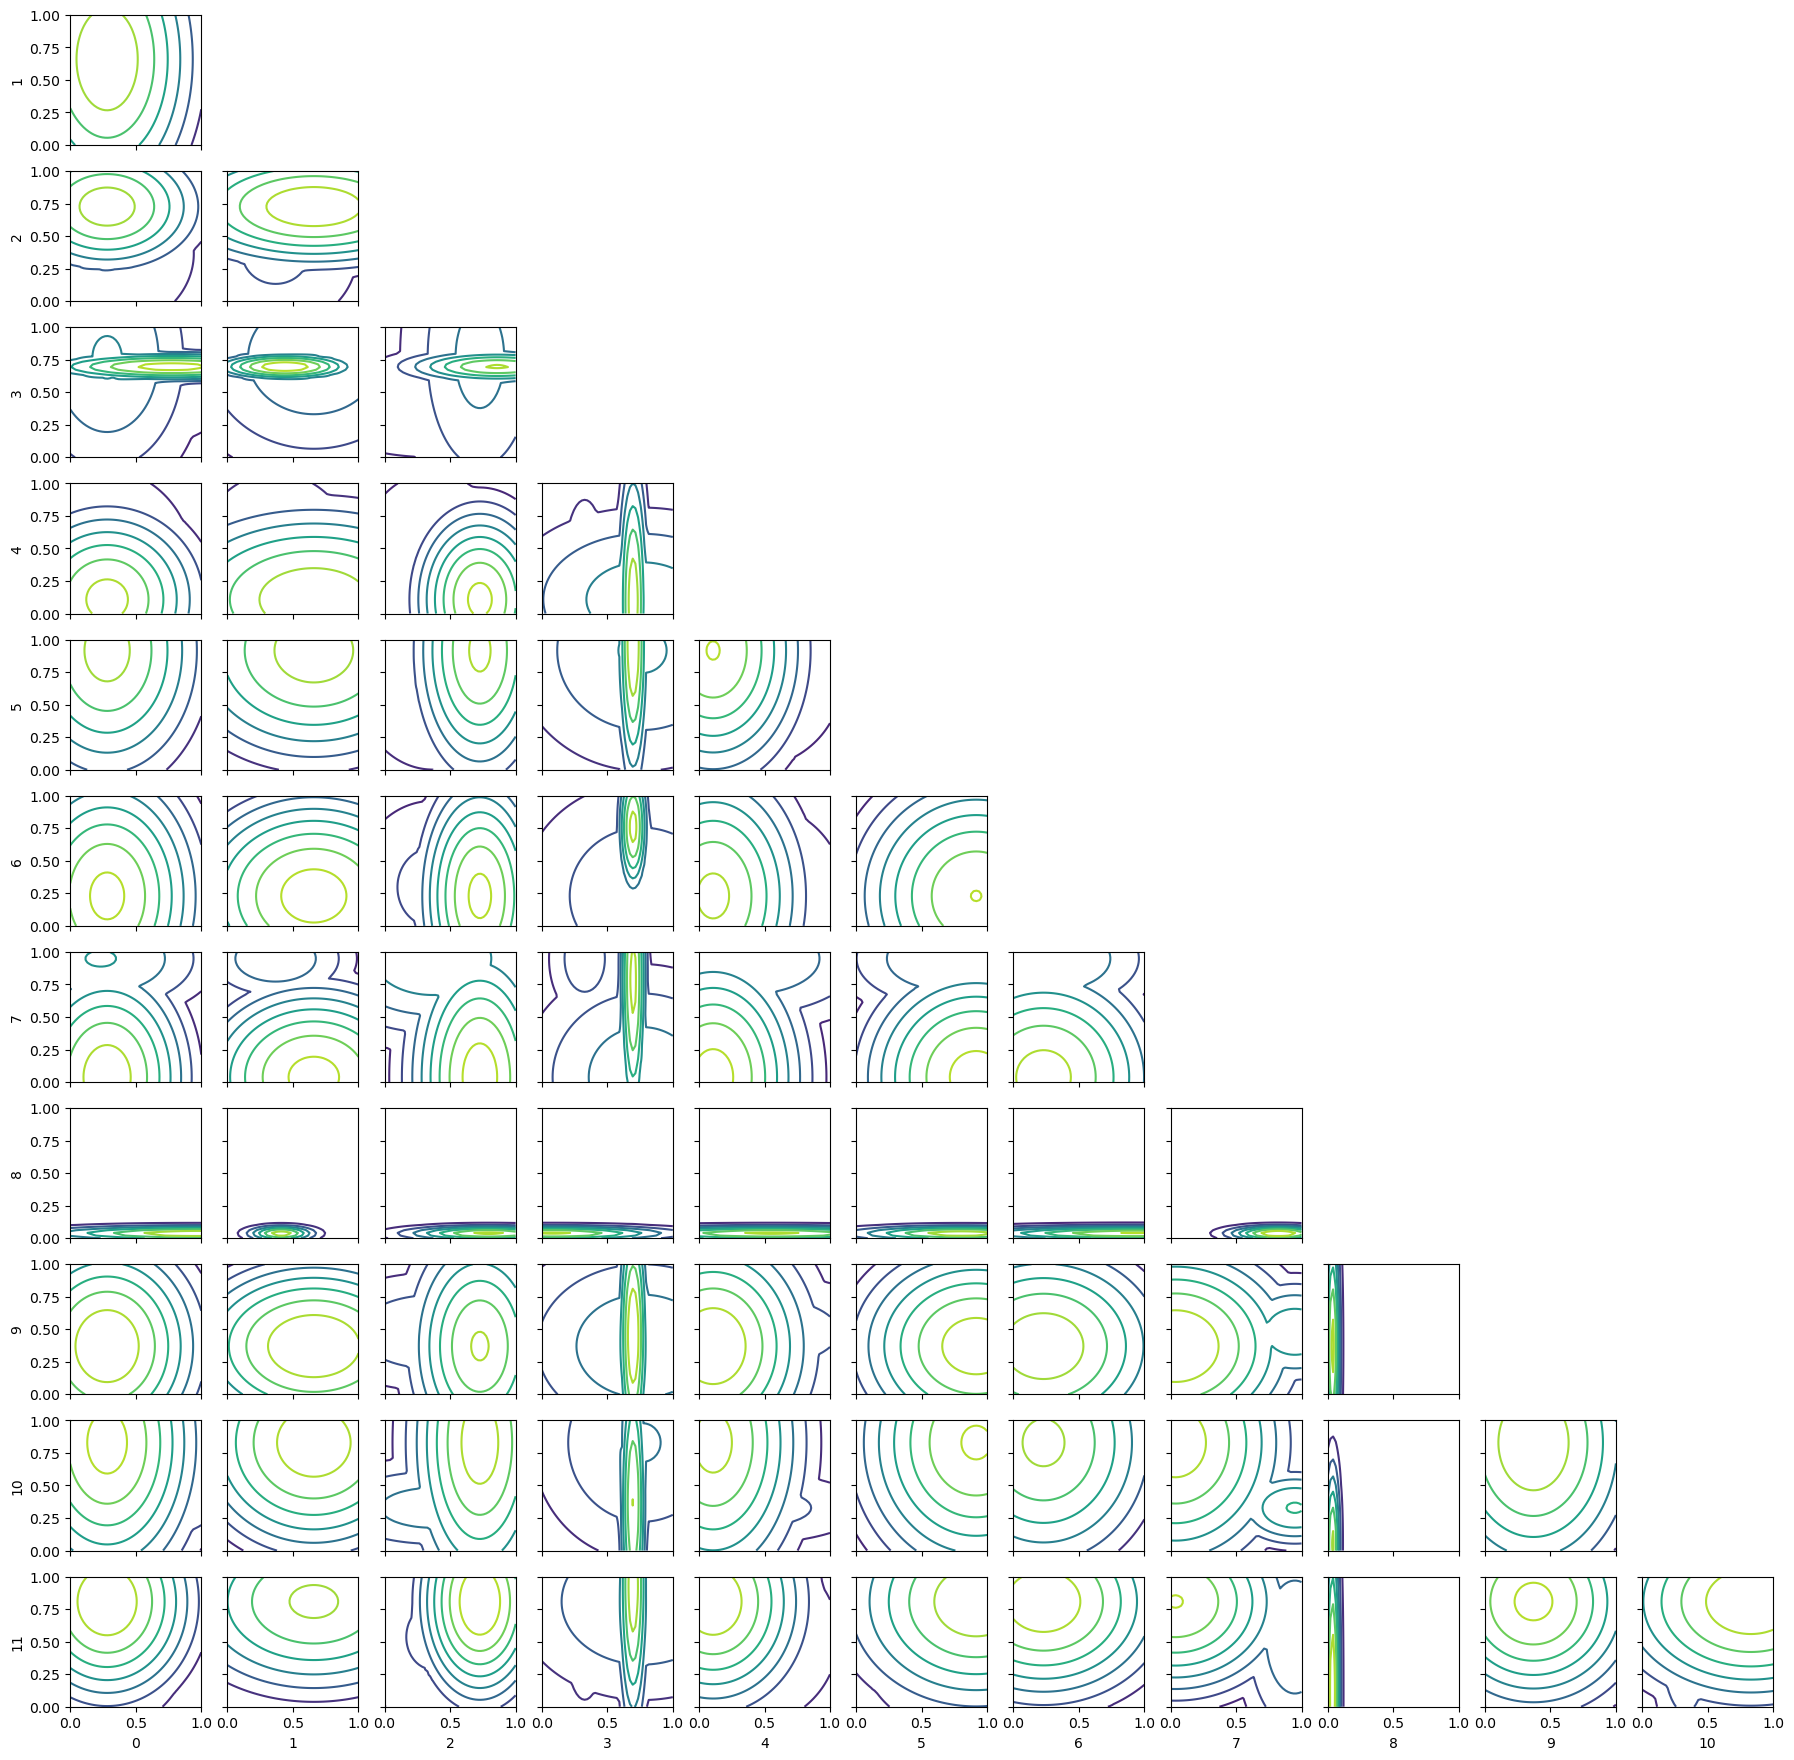

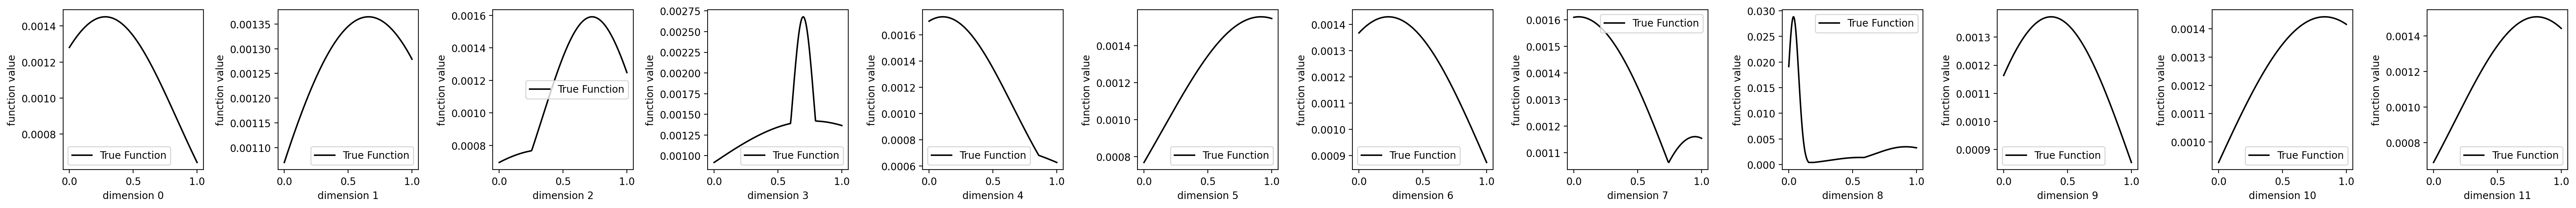

In [ ]:
import sys, os
sys.path.append('../')

from GENE_ML.gene_ml.test_functions.max_of_many_gaussians import MaxOfManyGaussians
import numpy as np
import matplotlib.pyplot as plt


num_dim = 12
bounds = [(0,1) for i in range(num_dim)]
num_gaussians = 5
# std=0.5
mmg = MaxOfManyGaussians(num_dim, bounds)#num_dim, num_gaussians, bounds, mean_bounds, std_bounds, seed=10)

mmg.random_gaussians(num_dim, num_gaussians, bounds=bounds)
# mmg.specify_gaussians(means=np.array([[0.25,0.25], [0.75,0.75]]), stds = np.array([[std,std],[std,std]]))
# mmg.plot_2d_gaussians(extra=0, grid_size=200, plot_bounds=[(0,1),(0,1)], style='contour')
# mmg.plot_2D_of_many(which2=(0,1), style='contour')
mmg.plot_matrix_contour()
mmg.plot_slices()

# if num_dim == 2: 
#     fig1, ax1 = plt.subplots(1,1, figsize=(4,4))
#     fig2, ax2 = plt.subplots(1,1, figsize=(4,4))
#     mmg.plot_2d_gaussians(ax1, ax_3d=ax2)

# fig2.tight_layout()
# fig2.savefig(fname='3d_gaussian',dpi=400)

import sys
sys.path.append('/home/djdaniel/GENE_UQ/SGPP_testing/sensitivity-driven-sparse-grid-approx/')

from sg_lib.grid.grid import *
from sg_lib.algebraic.multiindex import *
from sg_lib.operation.interpolation_to_spectral import *
from sg_lib.adaptivity.spectral_scores import *

# discrete approximation of the Pearson correlation coefficient
# see the Peherstorfer, Willcox, Gunzburger 2016 paper for the formula
def compute_corr_coeff(hi_fi_evals, lo_fi_evals):

	mean_hi_fi = np.mean(hi_fi_evals)
	mean_lo_fi = np.mean(lo_fi_evals)

	std_hi_fi = np.std(hi_fi_evals, ddof=1)
	std_lo_fi = np.std(lo_fi_evals, ddof=1)

	rho_12 = np.sum(np.array([(hi_fi_eval - mean_hi_fi)*(lo_fi_eval - mean_lo_fi) \
				for hi_fi_eval, lo_fi_eval in zip(hi_fi_evals, lo_fi_evals)]))/(std_hi_fi*std_lo_fi*(len(hi_fi_evals) - 1.))

	return rho_12

# high-fidelity model for this test
def hi_fi_model(x):
	print('shape',x.shape)
	test = np.cos(np.pi + 1.0*x[0] + 0.55*x[1]) # + 0.8*x[2] + 0.1*x[3]) + 1.0

	return test

def hi_fi_model(x):
    # print(x.shape, x)
    x = x.reshape((1,len(x)))
    # print(x.shape, x)
    return mmg.evaluate(x)

# hi_fi_model = lambda x: mmg.evaluate(np.array([x[0], x[1]]))
# print('hifi test',hi_fi_model(np.array([1,1])))
if __name__ == '__main__':

	# problem setup
	dim = 12

	# sparse grid setup
	# here, we consider a uniform input distribution, thus the bounds are [0, 1]^dim
	left_bounds 	= np.zeros(dim)
	right_bounds 	= np.ones(dim)
	# sparse grids always begin at level 1
	grid_level 		= 1
	# not important; keep it 1 for interpolation
	level_to_nodes 	= 1
	# probability density function; in this case, we have a uniform density in [0, 1]^dim
	# since the stochastic inputs are independent, it has a product structure
	weights 		= [lambda x: 1. for i in range(dim)]

	# tolerance used in the adaptive algorithm
	tols 		= 1e-20*np.ones(dim + 1)
	# maximum level reachable by the sparse grid
	max_level 	= 20

	# first multiindex in K is (1, 1, ... , 1)
	init_multiindex = np.ones(dim, dtype=int)
	
	# create objects to do sensitivity-driven adaptve sparse grid interpolation

	# grid object
	Grid_obj 				= Grid(dim, grid_level, level_to_nodes, left_bounds, right_bounds, weights)
	# multiindex object
	Multiindex_obj 			= Multiindex(dim)

	# interpolation object
	InterpToSpectral_obj 	= InterpolationToSpectral(dim, level_to_nodes, left_bounds, right_bounds, weights, max_level, Grid_obj)

	# adaptivity object; the most important thing is the refinement indicator; see the paper
	# see also the implementation
	Adaptivity_obj 			= SpectralScores(dim, tols, init_multiindex, max_level, level_to_nodes, InterpToSpectral_obj)

	# add initial multiindex to the multiindex set, aka, K = {(1, 1, ..., 1)}
	init_multiindex_set = Multiindex_obj.get_std_total_degree_mindex(grid_level)
	# take the grid points corresponding to the first multiindex
	init_grid_points 	= Grid_obj.get_std_sg_surplus_points(init_multiindex_set)
	init_no_points 		= Grid_obj.get_no_fg_grid_points(init_multiindex_set)

	InterpToSpectral_obj.get_local_global_basis(Adaptivity_obj)

	# begin the adaptive process

	sg_evals_all = []

	# first step, do the initial subspace which contains 1 point
	for sg_point in init_grid_points:
		sg_val = hi_fi_model(sg_point)
		InterpToSpectral_obj.update_sg_evals_all_lut(sg_point, sg_val)

		sg_evals_all.append(sg_val)

	InterpToSpectral_obj.update_sg_evals_multiindex_lut(init_multiindex, Grid_obj)
	
	# adaptivity begins here; see paper, especially the algorithms, for more details
	Adaptivity_obj.init_adaption()

	prev_len 		= len(init_no_points)
	no_adapt_steps 	= 0
	total_len 		= 1
	while  not Adaptivity_obj.stop_adaption:
		no_adapt_steps += 1

		new_multiindices = Adaptivity_obj.do_one_adaption_step_preproc()

		for multiindex in new_multiindices:
			new_grid_points = Grid_obj.get_sg_surplus_points_multiindex(multiindex)
			total_len 		+= len(new_grid_points)

			for sg_point in new_grid_points:
				sg_val = hi_fi_model(sg_point)

				sg_evals_all.append(sg_val)
			
				InterpToSpectral_obj.update_sg_evals_all_lut(sg_point, sg_val)

			InterpToSpectral_obj.update_sg_evals_multiindex_lut(multiindex, Grid_obj)

		print('ADAPTIVE STEP:',no_adapt_steps, 'NUM SAMPLES',total_len, 'MAX LEVEL',np.max(Adaptivity_obj.multiindex_set))
			
		Adaptivity_obj.do_one_adaption_step_postproc(new_multiindices)
		Adaptivity_obj.check_termination_criterion()

	print(sg_evals_all)

	# np.save('data/sg_evals_all.npy', sg_evals_all)

	print('adaptivity done after', str(no_adapt_steps), 'steps')
	print('grid size =', total_len, 'sparse grid points')

	InterpToSpectral_obj.get_local_global_basis(Adaptivity_obj)

	adapt_sg_lo_fi_model = lambda x: InterpToSpectral_obj.eval_operation_sg(Adaptivity_obj.multiindex_set, x)	

	# here, we compute the Pearson correlation coefficient between the high- and low-fidelity model, which will be relevant for doing  MFMC
	np.random.seed(9812788)
	corr_coeff_no_samples 	= 100
	corr_coeff_samples 		= np.random.uniform(0, 1, size=(corr_coeff_no_samples, dim))

	f_eval = [hi_fi_model(sample) for sample in corr_coeff_samples]

	f_approx = np.zeros(corr_coeff_no_samples)
	for i, sample in enumerate(corr_coeff_samples):
		f_approx[i] = adapt_sg_lo_fi_model(sample)

	corr_coeff = compute_corr_coeff(f_eval, f_approx)

	print('corr coeff(hi-fi model, lo-fi surrogate) = ',corr_coeff)

# SG++ Example With My Function

In [4]:
import pysgpp
from pysgpp import BoundingBox1D, BoundingBox
dim = 2
poly_basis_degree = 3
grid = pysgpp.Grid.createPolyBoundaryGrid(dim, poly_basis_degree)

bb = BoundingBox1D(-2,2)

grid.getBoundingBox().setBoundary(0,bb)
grid.getBoundingBox().setBoundary(1,bb)

for i in range(dim):
    print(grid.getBoundingBox().getBoundary(i).leftBoundary)
    print(grid.getBoundingBox().getBoundary(i).rightBoundary)
dir(grid.getBoundingBox().getBoundary(0).leftBoundary)

-2.0
2.0
-2.0
2.0


['__abs__',
 '__add__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getformat__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__le__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__round__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 'as_integer_ratio',
 'conjugate',
 'fromhex',
 'hex',
 'imag',
 'is_integer',
 'real']

: 

In [3]:
import sys, os
sys.path.append('../')
import ast
from GENE_ML.gene_ml.test_functions.max_of_many_gaussians import MaxOfManyGaussians
import numpy as np
import matplotlib.pyplot as plt


num_dim = 2
bounds = [(0,1) for i in range(num_dim)]
num_gaussians = 2
std=0.5
mmg = MaxOfManyGaussians(num_dim, bounds)#num_dim, num_gaussians, bounds, mean_bounds, std_bounds, seed=10)

mmg.specify_gaussians(means=np.array([[0.25,0.25], [0.75,0.75]]), stds = np.array([[std,std],[std,std]]))
# mmg.plot_2d_gaussians(extra=0, grid_size=200, plot_bounds=[(0,1),(0,1)], style='contour')
# mmg.plot_2D_of_many(which2=(0,1), style='contour')
mmg.plot_matrix_contour()

if num_dim == 2: 
    fig1, ax1 = plt.subplots(1,1, figsize=(4,4))
    fig2, ax2 = plt.subplots(1,1, figsize=(4,4))
    mmg.plot_2d_gaussians(ax1, ax_3d=ax2)

# fig2.tight_layout()
fig2.savefig(fname='3d_gaussian',dpi=400)

# import pysgpp library
import pysgpp
from pysgpp import BoundingBox1D, createOperationEval
import inspect

from scipy.stats import sobol_indices
from scipy.stats import qmc, uniform
from scipy.integrate import nquad

# make uniform distributions for each input, this is used later to calculate sobel indicies
dists = []
for b in bounds:
    assert b[1] > b[0]
    dists.append(uniform(loc=b[0], scale=b[1]-b[0]))

f = lambda x0, x1: mmg.evaluate([x0, x1])
# f = lambda x0, x1: 16.0 * (x0-1)*x0 * (x1-1)*x1*x1

dim = 2

poly_basis_degree = 3
grid = pysgpp.Grid.createPolyBoundaryGrid(dim, poly_basis_degree)

## Doesn't work, still samples between 0 and 1
# for d in range(dim):
#     bb = BoundingBox1D(*bounds[d])
#     grid.getBoundingBox().setBoundary(d,bb)

# grid = pysgpp.Grid.createLinearBoundaryGrid(dim)

gridStorage = grid.getStorage()

#create regular sparse grid, level 3
initial_level = 2
gridGen = grid.getGenerator()

gridGen.regular(initial_level)

print("number of initial grid points:    {}".format(gridStorage.getSize()))

alpha = pysgpp.DataVector(gridStorage.getSize())
print("length of alpha vector:           {}".format(alpha.getSize()))
# Obtain function values and refine adaptively 5 times

x0, x1, x0_leaf, x1_leaf = [], [], [], []

#We don't want to run the function for every point so a wrapper function should check to see if the point has been ran and if it has return that value
def dummy_runner(f, samples, labeled_samples=None):
    if type(labeled_samples) != type(None):
        # print('LABELED SAMPLES',labeled_samples.items())
        for k, v in samples.items():
            if k in labeled_samples.keys():
                samples[k] = labeled_samples[k]
            else:
                samples[k] = f(*k)
    else:
        for k, v in samples.items():
            samples[k] = f(*k)
    return samples
            
labeled_samples=None
samples = {}
# I want to know if there are any samples that have never been a leaf
was_leaf = []

samples_s = []
is_leaf_s = []
num_refinement_steps =50

integral, first_order_sobel_indicies, total_order_sobel_indicies = [], [], []


def eval(pos):
    opEval = createOperationEval(grid)
    pos_v = pysgpp.DataVector(len(pos))
    for i, p in enumerate(pos):
        pos_v[i] = float(np.round(p,3))
    return opEval.eval(alpha, pos_v)
def eval_many(positions):
    positions = np.array(positions)
    positions_dm = pysgpp.DataMatrix(positions)
    opEval = pysgpp.createOperationMultipleEval(grid, positions_dm)
    results = pysgpp.DataVector(len(positions))
    opEval.eval(alpha, results)
    ans = np.array(results.array())
    # ans = np.array([results.get(i) for i in range(len(positions))])
    return ans
    # ans = []
    # for pos in positions:
    #     ans.append(eval(pos))
    # out = np.array(ans)
    # return out
def eval_int(*pos):
    return eval(pos)

bounds_array = np.array(bounds).T
space_volume = np.prod(bounds_array[1]-bounds_array[0])

for refnum in range(num_refinement_steps):
    
    # make samples dict
    for i in range(gridStorage.getSize()):
        gp = gridStorage.getPoint(i)
        x0 = gp.getStandardCoordinate(0)
        x1 = gp.getStandardCoordinate(1)
        samples[(x0,x1)] = None
        if i > len(was_leaf):
            # print('APPENDING')
            was_leaf.append(False)
    was_leaf.append(False)
    
    # label samples
    samples = dummy_runner(f, samples, labeled_samples)
    samples_s.append(samples.copy())
    labeled_samples = samples.copy()
    
    # set function values in alpha
    is_leaf = []
    positions = []
    for i in range(gridStorage.getSize()):
        gp = gridStorage.getPoint(i)
        # print(dir(gp))
        # break
        x0 = gp.getStandardCoordinate(0)
        x1 = gp.getStandardCoordinate(1)
        positions.append([x0,x1])
        # print('function value',f(x0,x1), type(f(x0,x1)))
        # print('dict value',samples[(x0,x1)], type(samples[(x0,x1)]))
        alpha[i] = samples[(x0,x1)]
        if gp.isLeaf():
            was_leaf[i] = True
            is_leaf.append(True)
        else:
            is_leaf.append(False)     
    is_leaf_s.append(is_leaf)
    

    # break
    #This next function takes the function values, old alpha and turnes them into the surpluses, new alpha
    pysgpp.createOperationHierarchisation(grid).doHierarchisation(alpha)
    
    # get UQ quantities
    if dim ==2:
        grid_size = 100
        x = np.linspace(bounds[0][0], bounds[0][1], grid_size)
        y = np.linspace(bounds[1][0], bounds[1][1], grid_size)
        X, Y = np.meshgrid(x, y)
        pos = np.vstack((X.ravel(), Y.ravel())).T
        # pos = np.array(positions)
        Zmax = eval_many(pos)
        
        # an integral estimate for uniform dist is the mean of the points times the volume
        integral_estimate = np.mean(Zmax) * space_volume
        integral.append(integral_estimate)
        
        def calculate_sobol_indices(positions, evaluations):
            evaluations = np.array(evaluations)
            # positions = np.array(positions).T
            num_vars = positions.shape[1]
            num_samples = positions.shape[0]
            # Calculate the mean and variance of the evaluations
            mean_y = np.mean(evaluations)
            var_y = np.var(evaluations)
            # Initialize arrays to store Sobol indices
            S = np.zeros(num_vars)
            ST = np.zeros(num_vars)
            # Calculate first-order and total-order Sobol indices
            for i in range(num_vars):
                # Create arrays to store conditional variances
                V_i = np.zeros(num_samples)
                V_Ti = np.zeros(num_samples)
                for j in range(num_samples):
                    # Conditional variance for first-order index
                    V_i[j] = np.mean([evaluations[k] for k in range(num_samples) if positions[k, i] == positions[j, i]])
                    # Conditional variance for total-order index
                    V_Ti[j] = np.mean([evaluations[k] for k in range(num_samples) if positions[k, i] != positions[j, i]])
                # Calculate first-order Sobol index
                S[i] = np.mean(V_i) / var_y
                # Calculate total-order Sobol index
                ST[i] = 1 - np.mean(V_Ti) / var_y
            return S, ST
        fos, _ = calculate_sobol_indices(pos, Zmax)
        first_order_sobel_indicies.append(fos)        
        
        
        # Samples should come from the join probabilit distributions of the inputs
        # def approx_sobol_indices(f, samples):
        #     f_values = f(samples)     
        #     total_variance = np.var(f_values)
        #     sobol_indices = np.zeros(dim)
        #     for i in range(dim):
        #         fixed_samples = np.copy(samples.T)
        #         fixed_samples[:, i] = np.mean(samples.T[:, i])
        #         f_fixed_values = f(fixed_samples.T)
        #         sobol_indices[i] = np.var(f_fixed_values) / total_variance
        #     return sobol_indices
        # first_order_sobel_indicies.append(approx_sobol_indices(eval_many, pos))        
        # sobol = sobol_indices(func=eval_many, n=2**13, dists=dists)
        # first_order_sobel_indicies.append(sobol.first_order)
        # total_order_sobel_indicies.append(sobol.total_order)
    if dim == 2 and refnum == num_refinement_steps-1 or refnum==8:
        # print('example',eval((0.1,1.1))
        fig, (ax,ax_3d) = plt.subplots(1,2)
        Zmax, pos = mmg.plot_2d_gaussians(ax, ax_3d=ax_3d, grid_size=100, new_eval=eval) 
        ax.set_aspect('equal')
        # integrad, integrad_err = nquad(eval_int, bounds)
        # print(integrad, integrad_err)
        # integral.append
    # _______________
    
    gridGen.refine(pysgpp.SurplusRefinementFunctor(alpha, 1))
    print("refinement step {}, new grid size: {}".format(refnum+1, gridStorage.getSize()))    
    alpha.resizeZero(gridStorage.getSize())

debug tuple <class 'numpy.ndarray'>
debug tuple <class 'numpy.ndarray'>


: 

In [1]:
import numpy as np

def calculate_sobol_indices(positions, evaluations):
    num_vars = positions.shape[1]
    num_samples = positions.shape[0]

    # Calculate the mean and variance of the evaluations
    mean_y = np.mean(evaluations)
    var_y = np.var(evaluations)

    # Initialize arrays to store Sobol indices
    S = np.zeros(num_vars)
    ST = np.zeros(num_vars)

    # Calculate first-order and total-order Sobol indices
    for i in range(num_vars):
        # Create arrays to store conditional variances
        V_i = np.zeros(num_samples)
        V_Ti = np.zeros(num_samples)

        for j in range(num_samples):
            # Conditional variance for first-order index
            V_i[j] = np.mean([evaluations[k] for k in range(num_samples) if positions[k, i] == positions[j, i]])

            # Conditional variance for total-order index
            V_Ti[j] = np.mean([evaluations[k] for k in range(num_samples) if positions[k, i] != positions[j, i]])

        # Calculate first-order Sobol index
        S[i] = np.mean(V_i) / var_y

        # Calculate total-order Sobol index
        ST[i] = 1 - np.mean(V_Ti) / var_y

    return S, ST

# Example usage
positions = np.array([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]])
evaluations = np.array([1.0, 2.0, 3.0])
sobol_indices = calculate_sobol_indices(positions, evaluations)
print("First-order Sobol indices:", sobol_indices[0])
print("Total-order Sobol indices:", sobol_indices[1])

First-order Sobol indices: [3. 3.]
Total-order Sobol indices: [-2. -2.]


In [94]:
2**13, 50*50

(8192, 2500)

In [98]:
first_order_sobel_indicies[0]

array([nan, nan])

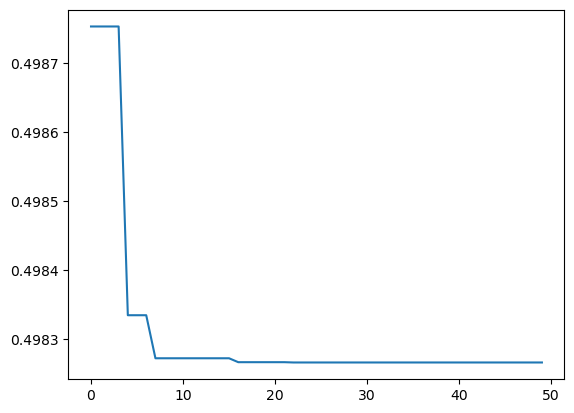

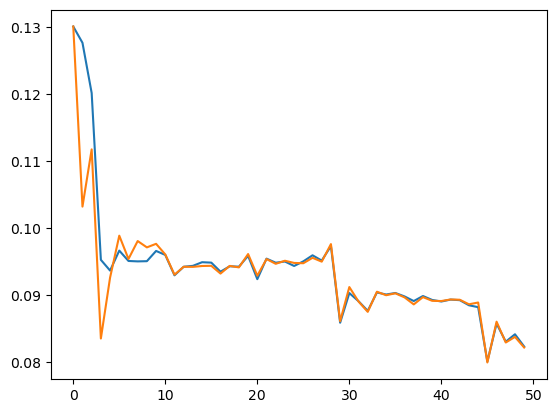

In [15]:

from matplotlib import pyplot as plt
fig = plt.figure()
plt.plot(integral)

fig = plt.figure()
fo_by_d = np.array(first_order_sobel_indicies).T
for fo in fo_by_d:
    plt.plot(fo)

# fig = plt.figure()
# to_by_d = np.array(total_order_sobel_indicies).T
# for to in to_by_d:
#     plt.plot(to)


In [ ]:

from matplotlib import pyplot as plt
fig = plt.figure()
plt.plot(integral)

fo_by_d = np.array(first_order_sobel_indicies).T
for fo in fo_by_d:
    fig = plt.figure()
    plt.plot(fo)

# fig = plt.figure()
# to_by_d = np.array(total_order_sobel_indicies).T
# for to in to_by_d:
#     plt.plot(to)


/tmp/ipykernel_596746/4097560646.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x75d0a42017c0>>
Traceback (most recent call last):
  File "/home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


In [18]:
import pysgpp as sg

# Step 1: Create a grid
dim = 2  # Dimension of the input space
level = 3  # Level of the grid
grid = sg.Grid.createLinearGrid(dim)
gridGen = grid.getGenerator()
gridGen.regular(level)

# Step 2: Create a data vector for the coefficients
alpha = sg.DataVector(grid.getSize())
alpha.setAll(0.0)

# Step 3: Compute hierarchical surpluses (example values)
# Normally, you would compute these based on your data
alpha[0] = 1.0
alpha[1] = 0.5
alpha[2] = -0.5

# Step 4: Evaluate the function at a new data point
x = sg.DataVector(dim)
x[0] = 0.5
x[1] = 0.5
opEval = sg.createOperationEval(grid)
result = opEval.eval(alpha, x)

print("Prediction:", result)

Prediction: 1.0


In [8]:
import inspect

def print_inputs(function):
    signature = inspect.signature(function)
    for param in signature.parameters.values():
        print(param)

print_inputs(pysgpp.SurplusRefinementFunctor)
dir(pysgpp.SurplusRefinementFunctor)

alpha: 'DataVector'
refinements_num: 'size_t' = 1
threshold: 'double' = 0.0


['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__swig_destroy__',
 '__weakref__',
 'getRefinementThreshold',
 'getRefinementsNum',
 'getTotalRefinementValue',
 'start',
 'thisown']

In [81]:
print(was_leaf)

[False False False ... False False False]


In [ ]:
was_leaf = []
for is_leaf in is_leaf_s:
    

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (200,) + inhomogeneous part.

In [39]:
mmg.bounds

[(-2, 2), (-2, 2)]

len samples 21


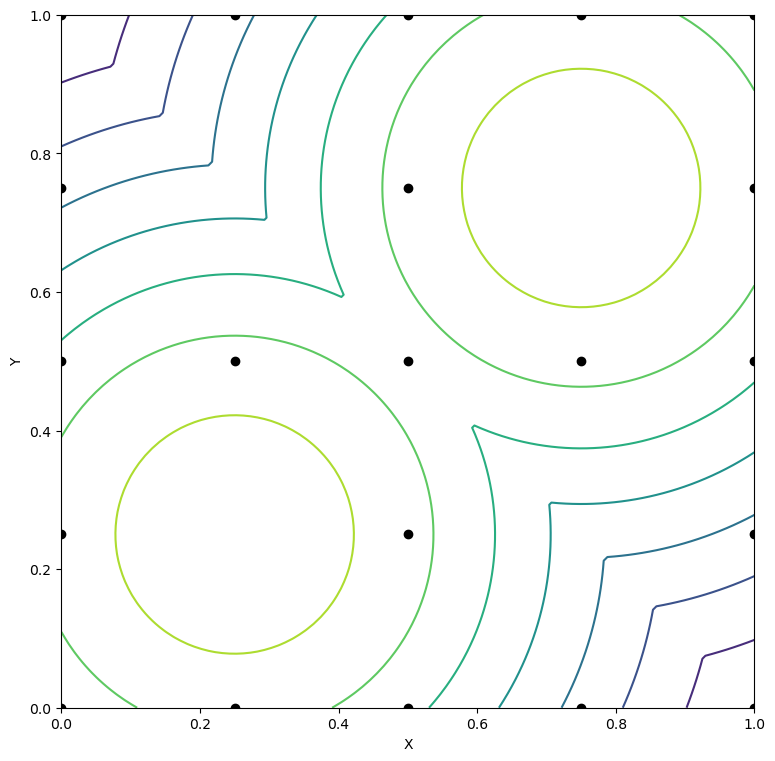

In [17]:
import matplotlib.pyplot as plt

samples_ss = [samples_s[0]] + [samples_s[20]] + [samples_s[50]]
is_leaf_ss = [is_leaf_s[0]] + [is_leaf_s[20]] + [is_leaf_s[50]]



for samples, is_leaf in zip(samples_ss, is_leaf_ss):
    print('len samples', len(samples))
    x0_ = []
    x1_ = []
    
    x0_leaf, x1_leaf = [], []
    for sample, leaf in zip(samples, is_leaf):
        x0, x1 = sample
        x0_.append(x0)
        x1_.append(x1)
        if leaf:
            x0_leaf.append(x0)
            x1_leaf.append(x1)

    fig, ax = plt.subplots(1,1, figsize=(9,9))
    ax.set_aspect(1)
    mmg.plot_2d_gaussians(ax, plot_bounds=bounds)
    # title=f"Initial Level: {initial_level}, Num Refinement Steps: {num_refinement_steps}, Final Num Points: {len(x0_)}"
    ax.scatter(x0_,x1_, color='black')
    # ax.set_title('Initial Sparse Grid')
    # ax.scatter(x0_leaf, x1_leaf, color='orange')
    fig.savefig(fname='initial_grid', dpi=300)
    break


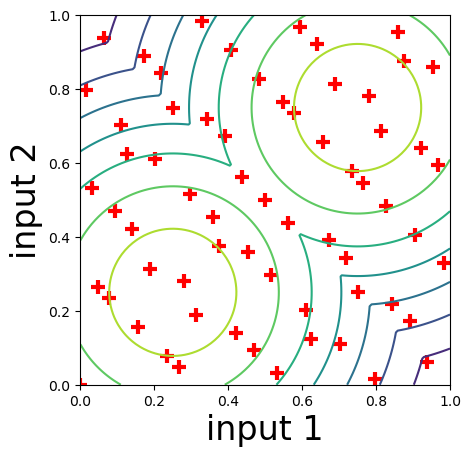

In [10]:
import matplotlib.pyplot as plt

from scipy.stats.qmc import Sobol

sobol = Sobol(d=2, scramble=False)
points = sobol.random_base2(m=6)  # Generates 2^power points


fig, ax = plt.subplots(1,1)
ax.set_aspect(1)
mmg.plot_2d_gaussians(ax, plot_bounds=bounds)
# title=f"Initial Level: {initial_level}, Num Refinement Steps: {num_refinement_steps}, Final Num Points: {len(x0_)}"
ax.scatter(*points.T, color='red',marker='+',s=100, linewidths=3)
ax.set_xlabel('input 1', fontsize=24)
ax.set_ylabel('input 2', fontsize=24)
# ax.set_title('Initial Sparse Grid')
# ax.scatter(x0_leaf, x1_leaf, color='orange')
fig.savefig(fname='sobolseq_grid', dpi=300)


# Plotting SG++ Grid

0
49


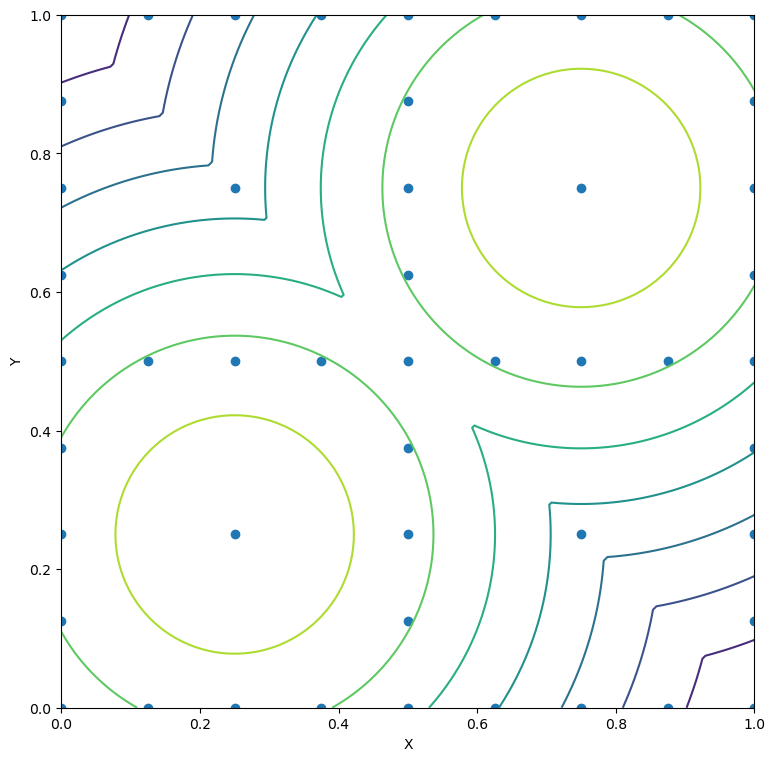

In [11]:
import matplotlib.pyplot as plt



x0 = []
x1 = []

x0_leaf = []
x1_leaf = []

x0_was_leaf = []
x1_was_leaf = []

x0_inner = []
x1_inner = []

x0_ancestor = []
x1_ancestor = []
for i in range(gridStorage.getSize()):
    gp = gridStorage.getPoint(i)
    
    if gp.isLeaf():
        x0_leaf.append(gp.getStandardCoordinate(0))
        x1_leaf.append(gp.getStandardCoordinate(1))
    
    if gp.isInnerPoint():
        x0_inner.append(gp.getStandardCoordinate(0))
        x1_inner.append(gp.getStandardCoordinate(1))
    
    try:
        if gp.isHierarchicalAncestor():
            x0_ancestor.append(gp.getStandardCoordinate(0))
            x1_ancestor.append(gp.getStandardCoordinate(1))
    except:
        None
        
    x0.append(gp.getStandardCoordinate(0))
    x1.append(gp.getStandardCoordinate(1))
    
    if i<len(was_leaf):
        if was_leaf[i]:
            x0_was_leaf.append(gp.getStandardCoordinate(0))
            x1_was_leaf.append(gp.getStandardCoordinate(1))
# plt.figure(dpi=100)
# plt.plot(x0,x1, '.')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.xlim(0,1)
# plt.ylim(0,1)

fig, ax = plt.subplots(1,1, figsize=(9,9))
ax.set_aspect(1)
mmg.plot_2d_gaussians(ax)
# title=f"Initial Level: {initial_level}, Num Refinement Steps: {num_refinement_steps}, Final Num Points: {len(x0)}"
ax.scatter(x0, x1)
# ax.scatter(x0_ancestor, x1_ancestor, color='black')
ax.scatter(x0_was_leaf, x1_was_leaf, color='black')
# plt.scatter(x0_leaf, x1_leaf, color='orange')
# plt.scatter(x0_inner, x1_inner, color='black')
# plt.scatter(x0_was_leaf, x1_was_leaf, color='orange')



print(len(x0_was_leaf))
print(len(x0))
fig.savefig(fname='sasg.png', dpi=300)

# Possible Changes Expressed

In [64]:
import inspect
import pysgpp

print(inspect.getfile(pysgpp.Grid))

/home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/pysgpp/pysgpp_swig.py


number of initial grid points:    1
length of alpha vector:           1
refinement step 1, new grid size: 5
refinement step 2, new grid size: 9
refinement step 3, new grid size: 12
refinement step 4, new grid size: 15
refinement step 5, new grid size: 17
refinement step 6, new grid size: 21
refinement step 7, new grid size: 25
refinement step 8, new grid size: 29
refinement step 9, new grid size: 33
refinement step 10, new grid size: 37
refinement step 11, new grid size: 41
refinement step 12, new grid size: 45
refinement step 13, new grid size: 49
refinement step 14, new grid size: 53
refinement step 15, new grid size: 58
refinement step 16, new grid size: 62
refinement step 17, new grid size: 67
refinement step 18, new grid size: 69
refinement step 19, new grid size: 71
refinement step 20, new grid size: 73
73


0.875

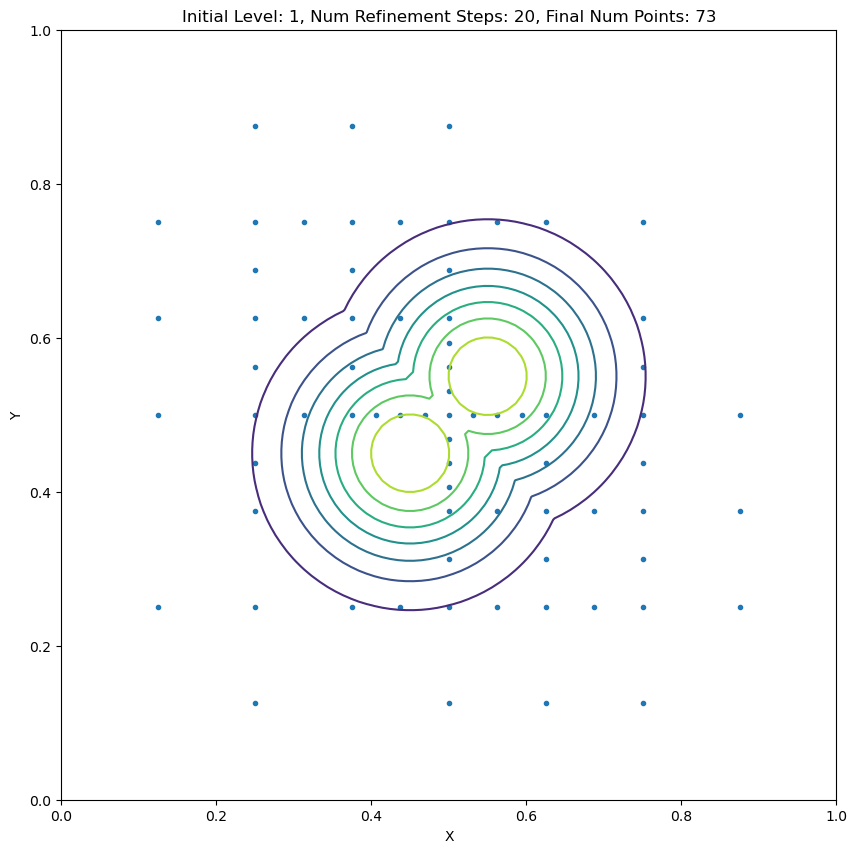

In [74]:
# import pysgpp library
import pysgpp

f = lambda x0, x1: mmg.evaluate([x0, x1])
# f = lambda x0, x1: 16.0 * (x0-1)*x0 * (x1-1)*x1*x1

dim = 2
level = 4
p = 3
hasBoundary = True

# basis1d = pysgpp.SBsplineBase(p)
# basis = pysgpp.HeterogeneousBasis(dim, basis1d)
# grid = pysgpp.Grid.createModBsplineGrid(dim, p)
# combiGrid = pysgpp.CombinationGrid.fromRegularSparse(dim, level, basis, hasBoundary)
# gridStorage = pysgpp.HashGridStorage(dim)
# max_grid_points=1000

# adaptivity of grid generation
# gamma = 0.95
# gridGen = pysgpp.OptIterativeGridGeneratorRitterNovak(f, grid, max_grid_points, gamma)

dim = 2
poly_basis_degree = 20
# grid = pysgpp.Grid.createPolyGrid(dim, poly_basis_degree)
grid = pysgpp.Grid.createLinearGrid(dim)
gridStorage = grid.getStorage()
#create regular sparse grid, level 3
initial_level = 1
gridGen = grid.getGenerator()
gridGen.regular(initial_level)
print("number of initial grid points:    {}".format(gridStorage.getSize()))

alpha = pysgpp.DataVector(gridStorage.getSize())
print("length of alpha vector:           {}".format(alpha.getSize()))
# Obtain function values and refine adaptively 5 times
num_refinement_steps = 20
for refnum in range(num_refinement_steps):
    # set function values in alpha
    for i in range(gridStorage.getSize()):
        gp = gridStorage.getPoint(i)
        alpha[i] = f(gp.getStandardCoordinate(0), gp.getStandardCoordinate(1))
    pysgpp.createOperationHierarchisation(grid).doHierarchisation(alpha)
    gridGen.refine(pysgpp.SurplusRefinementFunctor(alpha, 1))
    print("refinement step {}, new grid size: {}".format(refnum+1, gridStorage.getSize()))    
    alpha.resizeZero(gridStorage.getSize())
    
    
    
    
    
    
    
    
import matplotlib.pyplot as plt
x0 = []
x1 = []

for i in range(gridStorage.getSize()):
    gp = gridStorage.getPoint(i)
    x0.append(gp.getStandardCoordinate(0))
    x1.append(gp.getStandardCoordinate(1))
    
# plt.figure(dpi=100)
# plt.plot(x0,x1, '.')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.xlim(0,1)
# plt.ylim(0,1)
mmg.plot_2d_gaussians(onlyContour=True, sample_points=(x0,x1), title=f"Initial Level: {initial_level}, Num Refinement Steps: {num_refinement_steps}, Final Num Points: {len(x0)}")


print(len(x0))

np.max(x1)


In [77]:
inspect.getmembers(grid)

[('__class__', pysgpp.pysgpp_swig.Grid),
 ('__delattr__',
  <method-wrapper '__delattr__' of Grid object at 0x74fc80d3eed0>),
 ('__dict__',
  {'this': <Swig Object of type 'sgpp::datadriven::Grid *' at 0x74fc80d7fed0>}),
 ('__dir__', <function Grid.__dir__()>),
 ('__doc__',
  '\n\n    `Grid(other)`  \n\n    abstract base class for all types grids used in sgpp the class gives pure\n    virtual function definitions that have to be implemented by all types of grids  \n\n    Constructors\n    ------------\n    * `Grid(other)`  \n\n        delete copy constructor  \n\n        Parameters:  \n        * `other` :  \n\n    C++ includes: Grid.hpp\n\n    '),
 ('__eq__', <method-wrapper '__eq__' of Grid object at 0x74fc80d3eed0>),
 ('__format__', <function Grid.__format__(format_spec, /)>),
 ('__ge__', <method-wrapper '__ge__' of Grid object at 0x74fc80d3eed0>),
 ('__getattribute__',
  <method-wrapper '__getattribute__' of Grid object at 0x74fc80d3eed0>),
 ('__getstate__', <function Grid.__getstat

# As it is in the Example
https://sgpp.sparsegrids.org/docs/example_refinement_py.html

In [1]:
# import pysgpp library
import pysgpp

f = lambda x0, x1: 16.0 * (x0-1)*x0 * (x1-1)*x1*x1
dim = 2
grid = pysgpp.Grid.createPolyGrid(dim, 3)
gridStorage = grid.getStorage()

#create regular sparse grid, level 3
level = 5
gridGen = grid.getGenerator()
gridGen.regular(level)
print("number of initial grid points:    {}".format(gridStorage.getSize()))

alpha = pysgpp.DataVector(gridStorage.getSize())
print("length of alpha vector:           {}".format(alpha.getSize()))
# Obtain function values and refine adaptively 5 times
for refnum in range(5):
    # set function values in alpha
    for i in range(gridStorage.getSize()):
        gp = gridStorage.getPoint(i)
        alpha[i] = f(gp.getStandardCoordinate(0), gp.getStandardCoordinate(1))
    pysgpp.createOperationHierarchisation(grid).doHierarchisation(alpha)
    gridGen.refine(pysgpp.SurplusRefinementFunctor(alpha, 1))
    print("refinement step {}, new grid size: {}".format(refnum+1, gridStorage.getSize()))    
    alpha.resizeZero(gridStorage.getSize())

number of initial grid points:    129
length of alpha vector:           129
refinement step 1, new grid size: 133
refinement step 2, new grid size: 137
refinement step 3, new grid size: 141
refinement step 4, new grid size: 145
refinement step 5, new grid size: 149


# Possible Modifications

There are clearly more efficient approaches than to set the function values for all grid points and to hierarchize the whole grid each time. But this works even where no efficient alternatives are available and suffices for demonstration purposes.

This use of the SurplusRefinementFunctor takes as arguments the coefficient vector (it doesn't have to be the coefficient vector, it could be something modified!) and the number of grid points to refine (if available). It bases its refinement decision on the absolute values of the vector's entries, *choosing the largest ones*. Other refinement functors are available or can be implemented.

# Combi Grid Example

Value of test function at [0.12 0.34]: 0.820974
Value of combined sparse grid interpolant at [0.12 0.34]: 0.774666
Level of selected full grid with index 1: [3 1]
Value of full grid interpolant at [0.12 0.34]: 0.564036


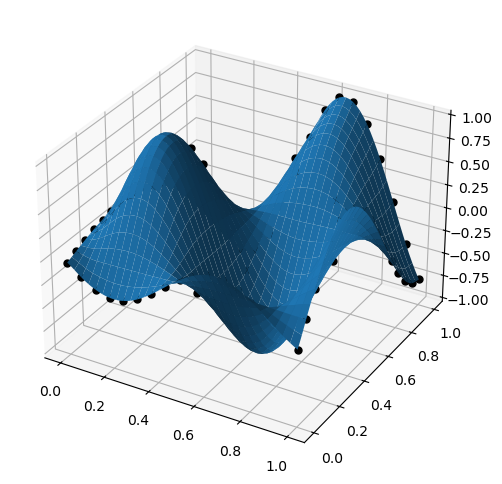

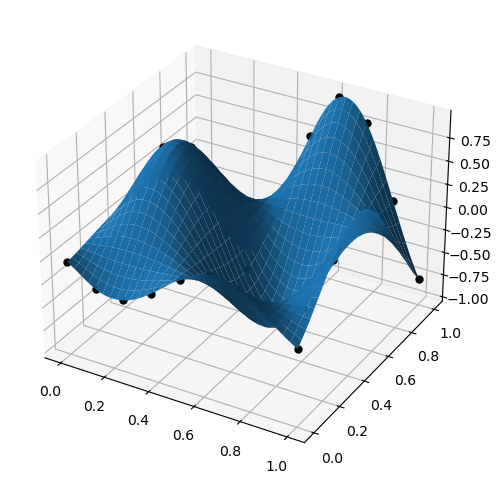

In [78]:
import pysgpp
import numpy as np
import sys
 
# skip plotting if Matplotlib cannot be imported (e.g., not installed or no GUI available)
try:
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  doPlot = True
except ImportError:
  doPlot = False
  
def plotFunction(opEval, surpluses, X):
  if not doPlot: return
 
  # generate a meshgrid for plotting
  xx0 = np.linspace(0, 1, 65)
  xx1 = np.linspace(0, 1, 65)
  XX0, XX1 = np.meshgrid(xx0, xx1)
  XX = pysgpp.DataMatrix(np.column_stack([XX0.flatten(), XX1.flatten()]))
 
  # evaluate interpolant at meshgrid
  YY = pysgpp.DataVector(0)
  opEval.multiEval(surpluses, XX, YY)
 
  # convert resulting sgpp::base::DataVector to NumPy array
  YY = np.reshape(np.array([YY[k] for k in range(YY.getSize())]), XX0.shape)
 
  # actual plotting
  fig = plt.figure(figsize=(6, 6))
  ax = fig.add_subplot(projection="3d")
  ax.plot_surface(XX0, XX1, YY)
  ax.plot(X[:,0], X[:,1], "k.", zs=f(X[:,0], X[:,1]), ms=10)
  
# dimensionality
dim = 2
# regular level
n = 4
# B-spline degree
p = 3
# whether there are points on the boundary
hasBoundary = True
# test function
f = lambda XX0, XX1: np.sin(7*XX0-3)*np.cos(5*XX1-5)
 
# disable log output
pysgpp.Printer.getInstance().setVerbosity(-1)

basis1d = pysgpp.SBsplineBase(p)
basis = pysgpp.HeterogeneousBasis(dim, basis1d)

combiGrid = pysgpp.CombinationGrid.fromRegularSparse(dim, n, basis, hasBoundary)

gridStorage = pysgpp.HashGridStorage(dim)
combiGrid.combinePoints(gridStorage)
 
# convert grid storage to array with coordinates of grid points
X = np.array([[gridStorage.getPoint(k).getStandardCoordinate(d) for d in range(dim)]
              for k in range(gridStorage.getSize())])
 
# evaluate test function at grid points
fX = pysgpp.DataVector(f(X[:,0], X[:,1]))

values = pysgpp.DataVectorVector()
combiGrid.distributeValuesToFullGrids(gridStorage, fX, values)

# copy the values (surpluses will be modified in-place)
surpluses = pysgpp.DataVectorVector(values)
 
# create pole operation
opPole = pysgpp.OperationPoleVector()
pysgpp.OperationPoleHierarchisationGeneral.fromHeterogenerousBasis(basis, opPole)
 
# create operation for unidirectional principle and hierarchize in-place
opHier = pysgpp.OperationUPCombinationGrid(combiGrid, opPole)
opHier.apply(surpluses)

# test point at which to evaluate
x = [0.12, 0.34]
xDv = pysgpp.DataVector(x)
print("Value of test function at {}: {:.6g}".format(np.array(x), f(*x)))
# create operation for evaluating and evaluate
opEval = pysgpp.OperationEvalCombinationGrid(combiGrid)
y = opEval.eval(surpluses, xDv)
print("Value of combined sparse grid interpolant at {}: {:.6g}".format(np.array(x), y))
# plot
plotFunction(opEval, surpluses, X)

# select the second full grid of the combination grid (arbitrary choice)
fullGridIndex = 1
fullGrid = combiGrid.getFullGrids()[fullGridIndex]
l = fullGrid.getLevel()
print("Level of selected full grid with index {}: {}".format(fullGridIndex, np.array(l)))
 
# create operation for evaluating and evaluate
opEval = pysgpp.OperationEvalFullGrid(fullGrid)
y = opEval.eval(surpluses[fullGridIndex], xDv)
print("Value of full grid interpolant at {}: {:.6g}".format(np.array(x), y))
 
# compute grid points of full grid
X = pysgpp.DataMatrix(0, 0)
pysgpp.IndexVectorRange.getPoints(fullGrid, X)
 
# convert resulting sgpp::base::DataMatrix to NumPy array
X = np.array([[X.get(k, j) for j in range(X.getNcols())] for k in range(X.getNrows())])
 
# plot
plotFunction(opEval, surpluses[fullGridIndex], X)
 
if doPlot: plt.show()
else: print("Skipping plots due to failed import of Matplotlib.")

# Value of test function at [0.12 0.34]: 0.820974
# Value of combined sparse grid interpolant at [0.12 0.34]: 0.774666
# Level of selected full grid with index 1: [3 1]
# Value of full grid interpolant at [0.12 0.34]: 0.564036

# Dumpster

Zmax [[2.08402576e-15 4.93065219e-15 1.14637732e-14 ... 1.54583104e-11
  9.08788489e-12 5.27040354e-12]
 [4.03051153e-15 9.53589484e-15 2.21709688e-14 ... 3.49335321e-11
  2.05372974e-11 1.19103451e-11]
 [7.68279801e-15 1.81769370e-14 4.22614038e-14 ... 7.74691806e-11
  4.55438515e-11 2.64125789e-11]
 ...
 [1.03537511e-10 2.19658390e-10 4.57714128e-10 ... 3.48902294e-11
  1.85049623e-11 9.68165623e-12]
 [6.18418181e-11 1.31199543e-10 2.73387621e-10 ... 1.90328991e-11
  1.00946048e-11 5.28142088e-12]
 [3.64640152e-11 7.73596618e-11 1.61198533e-10 ... 1.02372420e-11
  5.42959391e-12 2.84072245e-12]]


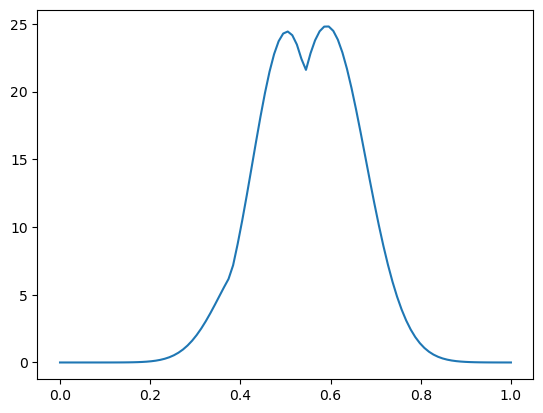

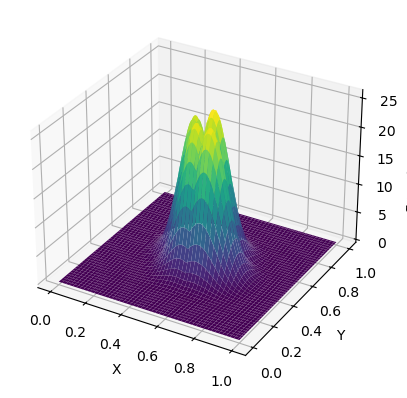

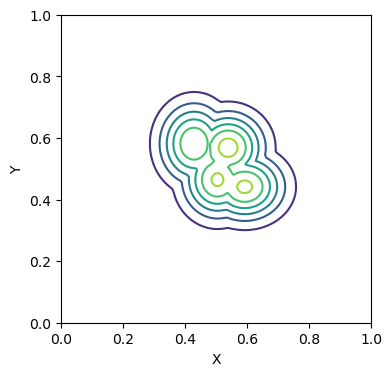

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

class MaxOfManyGaussians():
    def __init__(self, ndim, num_gaussians, bounds, std_bounds, rg):
        self.ndim = ndim
        self.bounds = bounds
        self.std_bounds = np.array(std_bounds)
        self.num_gaussians = num_gaussians
        self.rg = rg
        self.gaussians = self.generate_gaussians()

    def generate_gaussians(self):
        # Create a grid of points
        gaussians = []
        # Generate multiple 2D Gaussians
        for _ in range(self.num_gaussians):
            mean = []
            for b in self.bounds:
                mean.append(self.rg.uniform(*b, 1)[0])
            mean = np.array(mean)
            cov_bounds = self.std_bounds
            # cov = self.rg.uniform(*cov_bounds, (self.ndim, self.ndim))
            # cov = np.dot(cov, cov.T)  # Ensure the covariance matrix is positive semi-definite
            cov = np.diag(self.rg.uniform(*cov_bounds, (self.ndim,self.ndim)))
            gaussians.append(multivariate_normal(mean, cov))
        return gaussians

    def evaluate(self, pos):
        pos = np.array(pos)
        Z = []
        for g in self.gaussians:
            Z.append(g.pdf(pos))
        Zmax = np.max(np.stack(Z), axis = 0)
        # print('po', pos, Zmax)
        # print('shape',pos.shape, Zmax.shape)
        if len(pos)>2:
            Zmax[pos[:,:,0]>1] = 0
            Zmax[pos[:,:,1]>1] = 0
            Zmax[pos[:,:,0]<0] = 0
            Zmax[pos[:,:,1]<0] = 0        
        else:
            if (pos < 0).any() or (pos > 1).any():
                Zmax = 0
        print('Zmax',Zmax)
        # print('shape',pos.shape, Zmax.shape)
        # fixed bounds to 0 and 1, must be consistent with bounds inserted.
        # if (pos > 1).any() or (pos < 0).any():
        #     Zmax = np.zeros(Zmax.shape)
        return Zmax

    def plot_2d_gaussians(self, grid_size=100, onlyContour=False):
        if self.ndim != 2:
            raise ValueError('Daniel Says: n_dim must equil 2')
        extra = 1-self.bounds[0][1]
        xlow, xhigh = self.bounds[0][0]-extra, self.bounds[0][1]+extra
        ylow, yhigh = self.bounds[1][0]-extra, self.bounds[1][1]+extra
        x = np.linspace(xlow, xhigh, grid_size)
        y = np.linspace(ylow, yhigh, grid_size)
        X, Y = np.meshgrid(x, y)
        pos = np.dstack((X, Y))
                
        
        Zmax = self.evaluate(pos)
        
        z = []
        yy = 0.45
        x_at_y = [(xi, yy) for xi in x]
        for g in self.gaussians:
            z.append(g.pdf(x_at_y))
        zmax = np.max(np.stack(z), axis = 0)
        #slice
        if not onlyContour:
            plt.figure()
            plt.plot(x, zmax)
            plt.show()
            
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            ax.plot_surface(X, Y, Zmax, cmap='viridis')
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_zlabel('Function Value')
            # ax.set_title('2D Surface of Multimodal Multivariate Gaussian Distribution')
            ax.view_init(elev=30, azim=30-90)

        fig = plt.figure(figsize=(4,4))
        plt.contour(X,Y,Zmax)
        plt.xlim(0,1)
        plt.ylim(0,1)
        plt.xlabel('X')
        plt.ylabel('Y')


seed = 10
rg = np.random.default_rng(seed=seed)
mmg = MaxOfManyGaussians(2, 5, [(0.4,0.6), (0.4,0.6)], std_bounds=(0.005,0.008), rg=rg)
# mmg = MaxOfManyGaussians(2, 5, [(0,1), (0,1)], std_bounds=(0.1,0.1), rg=rg)

mmg.plot_2d_gaussians()

# max_value, max_pos = generate_2d_gaussians(num_gaussians, grid_size)
# print(f"Maximum Gaussian value: {max_value} at position {max_pos}")



In [16]:
pos = np.array([0,4,5,1])

(pos > 1).any()

True

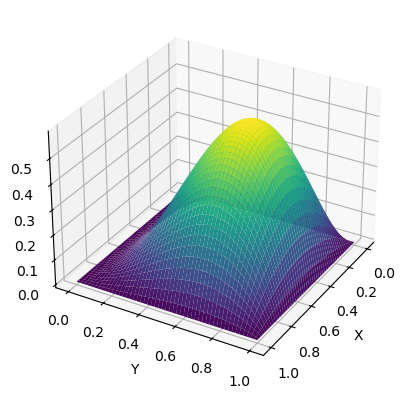

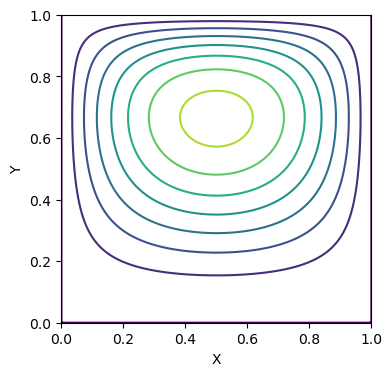

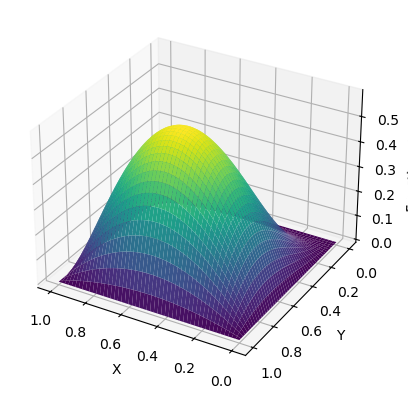

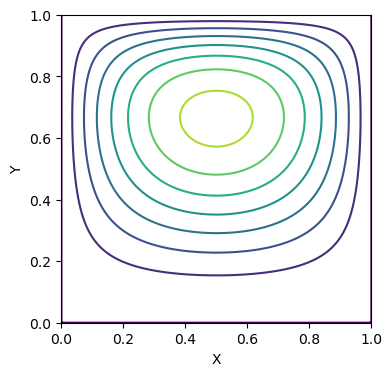

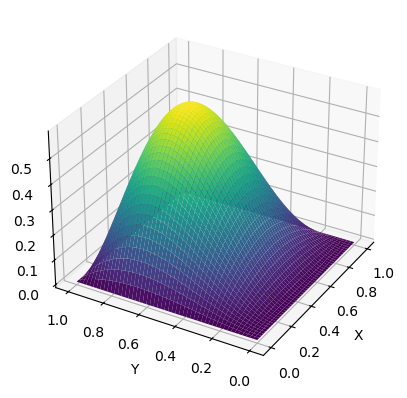

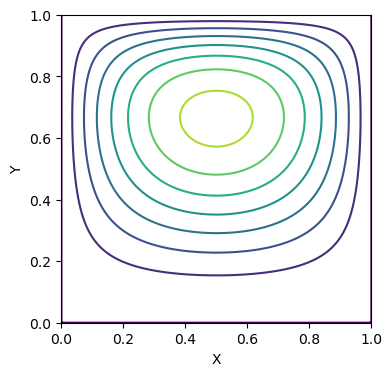

In [17]:
f = lambda x0, x1: 16.0 * (x0-1)*x0 * (x1-1)*x1*x1

# Generate a grid of coordinates
x = np.linspace(0, 1, 200)
y = np.linspace(0, 1, 200)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

# Calculate the function value at each coordinate in the grid
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = f(X[i, j], Y[i, j])

def plot_surface(X,Y,Z, elev, azim):
    # Plot the 2D surface
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Function Value')
    ax.view_init(elev=elev, azim=azim)
    plt.show()
    fig = plt.figure(figsize=(4,4))
    plt.contour(X,Y,Z)
    plt.xlabel('X')
    plt.ylabel('Y')


azim = [0,90,180]

for a in azim:
    plot_surface(X,Y,Z, elev=30, azim=a+30)


In [ ]:
# import pysgpp library
import pysgpp

#create a two-dimensional piecewise bi-linear grid
dim = 2
grid = pysgpp.Grid.createPolyGrid(dim, 3)

#Efforts to keep it in the bounds when function is non zero at boundary
boundingBox = grid.getBoundingBox()
# boundingBox.setInterval(0, 0, 1.0)  # Set limits for the first dimension
# boundingBox.setInterval(1, 0, 1.0)  # Set limits for the second dimension
print('B',boundingBox.getBoundary(0).leftBoundary,boundingBox.getBoundary(0).rightBoundary)
print('B',boundingBox.getBoundary(1).leftBoundary, boundingBox.getBoundary(1).rightBoundary)

gridStorage = grid.getStorage()
# gridStorage.setBoundingBox(boundingBox)
print("dimensionality:                   {}".format(dim))

#create regular sparse grid, level 3
level = 5
gridGen = grid.getGenerator()
gridGen.regular(level)
print("number of initial grid points:    {}".format(gridStorage.getSize()))



#function to interpolate. This is a two-dimensional parabola. - nonsymmetric(!)
# f = lambda x0, x1: 16.0 * (x0-1)*x0 * (x1-1)*x1*x1
f = lambda x0, x1: mmg.evaluate([x0, x1])
#create coefficient vector with size corresponding to the grid size. Initially, all the values are set to zero.
alpha = pysgpp.DataVector(gridStorage.getSize())
print("length of alpha vector:           {}".format(alpha.getSize()))
# Obtain function values and refine adaptively 5 times
x0 = []
x1 = []
for refnum in range(10):
    # set function values in alpha
    # alpha2 = []
    for i in range(gridStorage.getSize()):
        gp = gridStorage.getPoint(i)
        x0_ = gp.getStandardCoordinate(0)
        x1_ =  gp.getStandardCoordinate(1)
        alpha[i] = f(x0_, x1_)
        x0.append(x0_)
        x1.append(x1_)
        print(gp.getStandardCoordinate(0), gp.getStandardCoordinate(1))
        # alpha2.append(f(gp.getStandardCoordinate(0), gp.getStandardCoordinate(1)))
        # gp = gridStorage.getPoint(i)
        # print(gp)

    # print(np.min(np.array(alpha2)), np.max(np.array(alpha2)))    
    gp = gridStorage.getPoint(i)

    #Each time, we have to hierarchize the grid again, because in the previous interation, new grid points have been added.
    pysgpp.createOperationHierarchisation(grid).doHierarchisation(alpha)

    #Refine a single grid point each time. The SurplusRefinementFunctor chooses the grid point with the highest absolute surplus. Refining the point means, that all children of this point (if not already present) are added to the grid. Also all missing parents are added (recursively).
    # gridGen.refine(pysgpp.SurplusRefinementFunctor(alpha, 1))
    gridGen.refine(pysgpp.PredictiveRefinementIndicator(alpha, 1))
    print("refinement step {}, new grid size: {}".format(refnum+1, gridStorage.getSize()))

    #Extend alpha vector (new entries uninitialized). Note that right now, the surplus vector has the correct size again, but the values of the new points are set to zero. The correct surplus values will be inserted in the next iteration of the refinement loop.
    alpha.resizeZero(gridStorage.getSize())




B 0.0 1.0
B 0.0 1.0
dimensionality:                   2
number of initial grid points:    129
length of alpha vector:           129
Zmax 1.3573595690775904
0.5 0.5
Zmax 0.949761655549538
0.25 0.5
Zmax 1.0383437060780356
0.75 0.5
Zmax 0.6958299775088317
0.125 0.5
Zmax 1.2276767378292572
0.375 0.5
Zmax 1.2836519304349892
0.625 0.5
Zmax 1.004662858426013
0.875 0.5
Zmax 0.6762781623247506
0.0625 0.5
Zmax 0.787830866745858
0.1875 0.5
Zmax 1.1011123749057372
0.3125 0.5
Zmax 1.3163512252347336
0.4375 0.5
Zmax 1.3460258724812333
0.5625 0.5
Zmax 1.1772712020768354
0.6875 0.5
Zmax 0.9365940851013751
0.8125 0.5
Zmax 1.0363934393910048
0.9375 0.5
Zmax 0.6570141799000493
0.03125 0.5
Zmax 0.6893421398018479
0.09375 0.5
Zmax 0.7070993479448316
0.15625 0.5
Zmax 0.8692493820314768
0.21875 0.5
Zmax 1.027646426209194
0.28125 0.5
Zmax 1.1683646639982266
0.34375 0.5
Zmax 1.2774634492294128
0.40625 0.5
Zmax 1.3432409524350328
0.46875 0.5
Zmax 1.3582969855152243
0.53125 0.5
Zmax 1.320902984708551
0.59375 0.5

TypeError: PredictiveRefinementIndicator.__init__() missing 1 required positional argument: 'errorVector'

1470


0.99993896484375

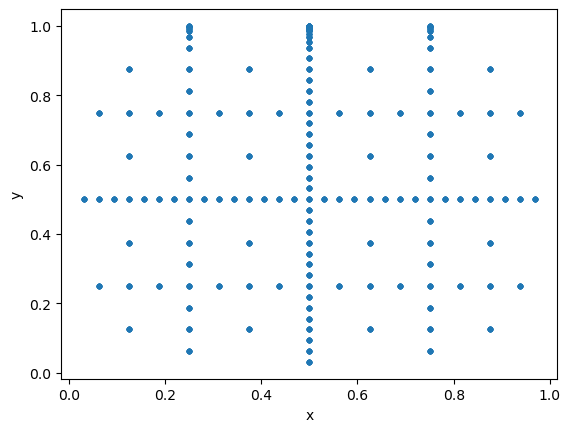

In [56]:
import matplotlib.pyplot as plt
# x0 = []
# x1 = []
# y = alpha
# x_train = []
# for i in range(gridStorage.getSize()):
#     gp = gridStorage.getPoint(i)
#     # x0.append(gp.getStandardCoordinate(0))
#     # x1.append(gp.getStandardCoordinate(1))
#     x_train.append([gp.getStandardCoordinate(0),gp.getStandardCoordinate(1)])
#     # opEval = createOperationEval(grid)
#     # vec = DataVector(0)
#     # vec.append(gp.getStandardCoordinate(0))
#     # vec.append(gp.getStandardCoordinate(1))
#     # print('vec', vec)
#     # print('function value', f(gp.getStandardCoordinate(0), gp.getStandardCoordinate(1)))
#     # print('opEval', opEval.eval(alpha,vec))
    
#     # error[i] = pow(f(dataSet.get(i,0),dataSet.get(i,1))-opEval.eval(alpha,vec),2)
plt.figure(dpi=100)
plt.plot(x0,x1, '.')
plt.xlabel('x')
plt.ylabel('y')
# plt.xlim(0,1)
# plt.ylim(0,1)

print(len(x0))

np.max(x1)

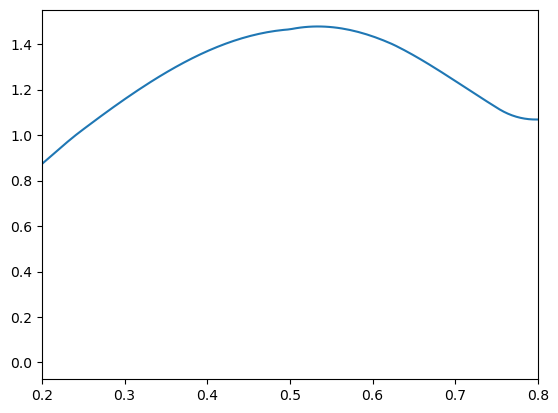

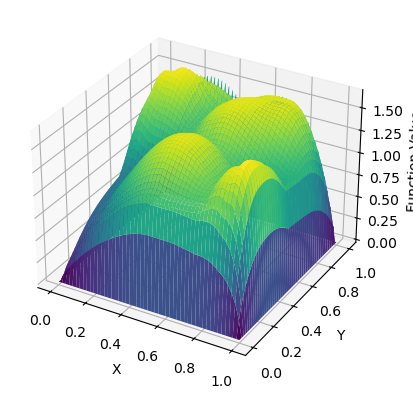

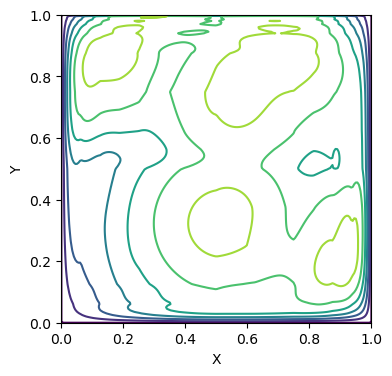

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pysgpp import DataVector, createOperationEval
# Define the function
def sgpp_OpEval(X, grid, alpha):
    vec = DataVector(0)
    vec.append(X[0])
    vec.append(X[1])
    opEval = createOperationEval(grid)
    z = opEval.eval(alpha,vec)
    return z 

sgpp_OpEval_f = lambda X: sgpp_OpEval(X, grid=grid, alpha=alpha)

# Generate 2D input data
x = np.linspace(0, 1, 200)
y = np.linspace(0, 1, 200)
X, Y = np.meshgrid(x, y)
Z = np.array([sgpp_OpEval_f(np.array([xi, yi])) for xi, yi in zip(np.ravel(X), np.ravel(Y))])
Z = Z.reshape(X.shape)

## Slice
yy = 0.45
z = np.array([sgpp_OpEval_f(np.array([xi, yy])) for xi in x])
plt.figure()
plt.plot(x,z)
plt.xlim(0.2,0.8)

# # Create a 3D mesh plot
# fig = plt.figure(dpi=200)
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(X, Y, Z, cmap='viridis')

# # Set plot labels
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('sgpp_OpEval_f(X, Y)')
# ax.view_init(elev=30, azim=0)
# Show plot
# plt.show()

azim = [30-90]

for a in azim:
    plot_surface(X,Y,Z, elev=30, azim=a)
    

1470
Zmax [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


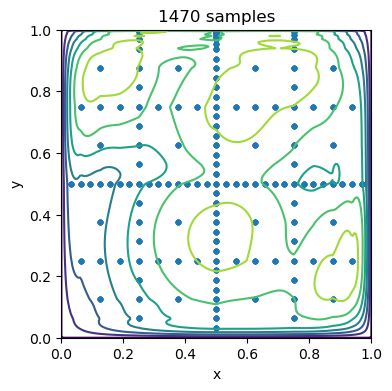

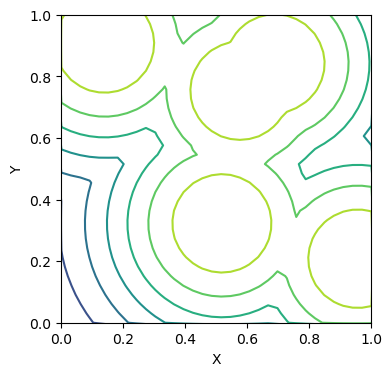

In [58]:
plt.figure(figsize=(4,4))
plt.plot(x0,x1, '.')
plt.xlabel('x')
plt.ylabel('y')
# plt.xlim(0,1)
# plt.ylim(0,1)
plt.contour(X,Y,Z)
plt.title(f'{len(x0)} samples')
# plt.xlim(-0.5,1.5)
# plt.ylim(-0.5,1.5)
print(len(x0))

mmg.plot_2d_gaussians(onlyContour=True)